In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
feature = pd.read_csv('imputed features_final.csv') 
optimal_target = pd.read_csv('Optimal_target_with_92_Q3_2점.csv') 
real_target = pd.read_csv('Real_target_full_time.csv') 

In [3]:
opt_data = pd.merge(feature, optimal_target, on = 'SubjectID')
opt_data = opt_data.drop(columns=['SubjectID','Unnamed: 0_x', 'Unnamed: 0_y'])
opt_data = opt_data[['Age', 'Gender', 'onset_site', 'onset_delta',
       'diag_minus_onset', 'slope_alsfrs_tot',
       'fvc_slope', 'fvc_mean',  'mean_Q10_Respiratory',
       'mean_Bulbar', 'mean_motor', 'slope_Q1_Speech', 'slope_Q2_Salivation',
       'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 'slope_Q5_Cutting',
       'slope_Q6_Dressing_and_Hygiene', 'slope_Q7_Turning_in_Bed',
       'slope_Q8_Walking', 'slope_Q9_Climbing_Stairs', 'slope_Q10_Respiratory', 
       'time_opt', 'status_opt']]

In [4]:
y = opt_data[['status_opt']]

In [5]:
from sklearn.model_selection import train_test_split

df_train, df_test, y_train, y_test = train_test_split(opt_data, y, train_size=0.8, test_size=0.2, random_state=11)

In [6]:
from lifelines import WeibullAFTFitter

aft = WeibullAFTFitter()
aft.fit(df_train, duration_col='time_opt', event_col='status_opt', ancillary=False)

aft.print_summary(3)

<lifelines.WeibullAFTFitter: fitted with 2719 total observations, 1787 right-censored observations>
             duration col = 'time_opt'
                event col = 'status_opt'
   number of observations = 2719
number of events observed = 932
           log-likelihood = -6526.950
         time fit was run = 2021-05-26 05:27:47 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                             
lambda_ Age                           -0.012      0.988      0.002           -0.016           -0.009                0.984                0.991
        Gender                         0.037      1.038      0.043           -0.048            0.122                0.953                1.129
        diag_minus_onset              -0.000      1.000      0.000           -0.001           -0.000                0.999                1.000
        fvc_mean                       0.004      1.004      0.001            0.001            0.006                1.001                1.007
        fvc_slope                      0.002      1.002      0.066           -0.126            0.131                0.881                1.140
        mean_Bulbar                    0.461      1.586      0.021            0.420            0.503                1.522                1.653
        mean_Q10_Respiratory           0.061      1.063      0.033           -0.004            0.127                0.996                1.135
        mean_motor                     0.036      1.037      0.005            0.027            0.046                1.027                1.047
        onset_delta                   -0.001      0.999      0.000           -0.001           -0.001                0.999                0.999
        onset_site                    -0.162      0.850      0.061           -0.283           -0.042                0.754                0.959
        slope_Q10_Respiratory          2.006      7.436      1.821           -1.562            5.575                0.210              263.672
        slope_Q1_Speech                0.964      2.623      1.651           -2.272            4.201                0.103               66.721
        slope_Q2_Salivation            1.243      3.467      1.953           -2.585            5.072                0.075              159.459
        slope_Q3_Swallowing            6.378    588.685      1.984            2.490           10.266               12.061            28733.197
        slope_Q4_Handwriting          -3.818      0.022      2.070           -7.874            0.239                0.000                1.270
        slope_Q5_Cutting               1.164      3.202      1.618           -2.008            4.335                0.134               76.349
        slope_Q6_Dressing_and_Hygiene -0.269      0.764      2.414           -5.001            4.463                0.007               86.746
        slope_Q7_Turning_in_Bed        0.772      2.165      0.875           -0.942            2.487                0.390               12.022
        slope_Q8_Walking              -1.020      0.360      2.176           -5.285            3.244                0.005               25.645
        slope_Q9_Climbing_Stairs      -1.216      0.296      1.849           -4.840            2.408                0.008               11.115
        slope_alsfrs_tot               1.591      4.910      1.313           -0.981            4.164                0.375               64.329
        Intercept                      2.504     12.235      0.209            2.095            2.914                8.122               18.431
rho_    Intercept                      0.488      1.628      0.024            0.441            0.534                1.554                1.707

                                           z       p   -log2(p)
param   covariate   

<AxesSubplot:xlabel='log(accelerated failure rate) (95% CI)'>

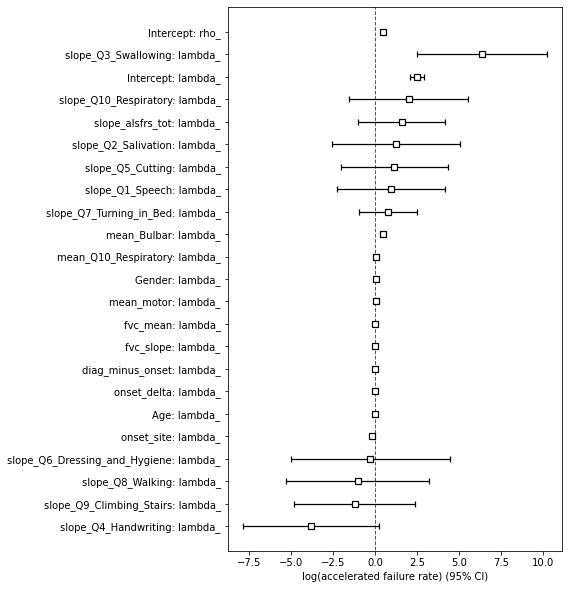

In [7]:
from matplotlib import pyplot as plt

wft = WeibullAFTFitter().fit(df_train, 'time_opt', 'status_opt', ancillary=False)
plt.figure(figsize=(6,10))
wft.plot()

In [8]:
from lifelines.utils import k_fold_cross_validation

In [9]:
aft = WeibullAFTFitter()
C_Idx = np.array([])
random_num_list = [10,20,30,40,50,60,70,80,90,100]

for i in random_num_list:
    arr = k_fold_cross_validation(aft, df_train, 'time_opt', event_col='status_opt', k=5, scoring_method="concordance_index")
    C_Idx = np.concatenate((C_Idx, arr))
print(C_Idx)

[0.84433273 0.84653821 0.82697144 0.83405861 0.82243896 0.81655432
 0.81881017 0.86772543 0.83266868 0.84319479 0.84462788 0.84838746
 0.8099263  0.84221364 0.8278504  0.84417505 0.84742198 0.84877148
 0.80110887 0.83916485 0.82170304 0.82157443 0.84880116 0.8224397
 0.85355896 0.8339438  0.85017206 0.80667219 0.83088437 0.84159909
 0.8602987  0.83424766 0.82461025 0.83937436 0.80462122 0.83659004
 0.83732929 0.83500278 0.83875022 0.82891762 0.81563761 0.84847464
 0.82898162 0.82520985 0.83860217 0.83443514 0.82265149 0.84235731
 0.83242507 0.84098557]


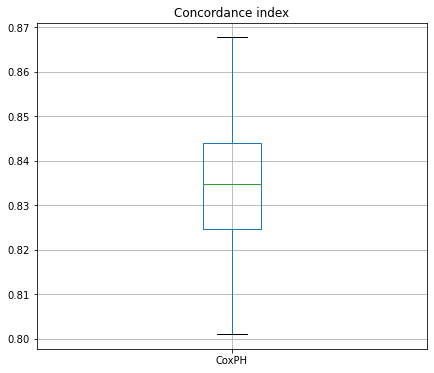

In [10]:
df = pd.DataFrame(C_Idx)
df.columns = ['AFT']

plt.figure(figsize=(7,6))
boxplot = df.boxplot(column=['AFT'])
plt.title('Concordance index')
plt.show()
